# Sprint 深層学習スクラッチ ニューラルネットワーク

In [28]:
# MNISTダウンロード
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [30]:
X_train[0].dtype

dtype('uint8')

In [31]:
# 用意した画像データセットを(サンプル数, 一次元の画素数)型に変換
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


# 可視化

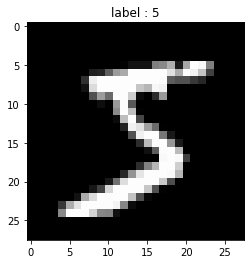

In [5]:
# 画像可視化
import matplotlib.pyplot as plt
%matplotlib inline

index = 0
image = X_train[index].reshape(28, 28)

plt.imshow(image, 'gray')
plt.title(f'label : {y_train[index]}')
plt.show()

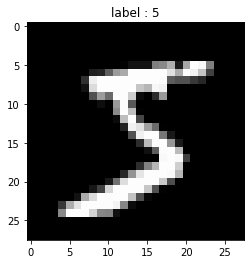

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
# コラム
import numpy as np
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

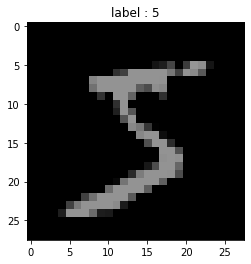

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [7]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

# 前処理

In [32]:
# 画素値を正規化処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 1.0
0.0 1.0


In [9]:
# ラベルをone-hot表現する
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_oh = enc.fit_transform(y_train[:, np.newaxis])
y_test_oh = enc.transform(y_test[:, np.newaxis])
print(y_train.shape, y_train_oh.shape, y_test_oh.shape)
print(y_train_oh)

(60000,) (60000, 10) (10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [33]:
# trainとvalデータに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(48000, 784) (12000, 784)
(48000,) (12000,)


# スクラッチ雛形

In [ ]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, verbose = True):
        self.verbose = verbose
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pass
        return

## ミニバッチ処理

In [14]:
# ミニバッチ処理のサンプルクラス
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [23]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch))
print(get_mini_batch[5])

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([1, 1, 3, 8, 3, 8, 2, 5, 0, 5, 6, 5, 2, 7, 7, 5, 3, 0, 0, 6],
      dtype=uint8))


# 学習

【問題1】重みの初期値を決めるコードの作成

In [12]:
# 問題1
def __init__(self, input_size=784, hidden1_size=400, hidden2_size=200, output_size=10,\
            sigma=0.01, batch_size=20, verbose = True):
    self.verbose = verbose
    self.input_size = input_size
    self.hidden1_size = hidden1_size
    self.hidden2_size = hidden2_size
    self.output_size = output_size
    self.sigma = sigma
    self.batch_size = batch_size
    self.Layers = {}
    self.Layers['W1'] = sigma * np.random.rand(self.input_size, self.hidden1_size)
    self.Layers['b1'] = sigma * np.random.rand(self.hidden1_size)
    self.Layers['W2'] = sigma * np.random.rand(self.hidden1_size, self.hidden2_size)
    self.Layers['b2'] = sigma * np.random.rand(self.hidden2_size)
    self.Layers['W3'] = sigma * np.random.rand(self.hidden2_size, self.output_size)
    self.Layers['b3'] = sigma * np.random.rand(self.output_size)
        

(1.5897040112067273e-08, 0.009999984798504473)

【問題2】フォワードプロパゲーションの実装

In [ ]:
# 問題2
def forward(self, X):
    batch_size = X.shape[0]
    self.X = X.reshape(batch_size, 784)
    # 1層目 出力shape:(batch_size, hidden1_size)
    self.a_1 = np.dot(self.X, self.Layers['W1']) + self.Layers['b1']
    # 1層目活性化関数
    self.z_1 = self.tanh(self.a_1)
    # 2層目 出力shape:(batch_size, hidden2_size)
    self.a_2 = np.dot(self.z_1, self.Layers['W2']) + self.Layers['b2']
    # 2層目活性化関数
    self.z_2 = self.tanh(self.a_2)
    # 3層目 出力shape:(batch_size, output_size)
    self.a_3 = np.dot(self.z_2, self.Layers['W3']) + self.Layers['b3']
    # 3層目活性化関数 (拝借)
    log_z_3 = self.a_3 - self.logsumexp(self.a_3)
    self.z_3 = np.exp(log_z_3)
#       print(log_z_3.shape, self.z_3.shape)
    return log_z_3

【問題3】交差エントロピー誤差の実装

In [30]:
def cross_entropy(Z, y):
    return np.mean(y * np.log(Z))

【問題4】バックプロパゲーションの実装

In [ ]:
def backprop(self, alpha=0.1):
    ga3 = (self.z_3 - self.y) / self.batch_size
    self.Layers['b3'] -= alpha * ga3.sum(axis=0)
    self.Layers['W3'] -= alpha * np.dot(self.z_2.T, ga3)
    gz2 = np.dot(ga3, self.Layers['W3'].T)
    ga2 = gz2 * (1 - self.z_2 ** 2)
    self.Layers['b2'] -= alpha * ga2.sum(axis=0)
    self.Layers['W2'] -= alpha * np.dot(self.z_1.T, ga2)
    gz1 = np.dot(ga2, self.Layers['W2'].T)
    ga1 = gz1 * (1 - self.z_1 ** 2)
    self.Layers['b1'] -= alpha * ga1.sum(axis=0)
    self.Layers['W1'] -= alpha * np.dot(self.X.T, ga1)

【問題5】推定

In [ ]:
def predict(self, X):
    """
    ニューラルネットワーク分類器を使い推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        推定結果
    """
    log_test_z3 = self.forward(X)
    
    return np.argmax(self.z_3, axis=1)

【問題6】学習と推定, 【問題7】学習曲線のプロット

In [102]:
# MNISTダウンロード
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 用意した画像データセットを(サンプル数, 一次元の画素数)型に変換
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X_train.shape, X_test.shape)

# 画素値を正規化処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

# trainとvalデータに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(60000, 784) (10000, 784)
0.0 1.0
0.0 1.0
(48000, 784) (12000, 784)
(48000,) (12000,)


In [113]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    # 問題1
    def __init__(self, input_size=784, hidden1_size=400, hidden2_size=200, output_size=10,\
                 sigma=0.01, batch_size=20, verbose = True):
        self.verbose = verbose
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.sigma = sigma
        self.batch_size = batch_size
        self.Layers = {}
        self.Layers['W1'] = sigma * np.random.rand(self.input_size, self.hidden1_size)
        self.Layers['b1'] = sigma * np.random.rand(self.hidden1_size)
        self.Layers['W2'] = sigma * np.random.rand(self.hidden1_size, self.hidden2_size)
        self.Layers['b2'] = sigma * np.random.rand(self.hidden2_size)
        self.Layers['W3'] = sigma * np.random.rand(self.hidden2_size, self.output_size)
        self.Layers['b3'] = sigma * np.random.rand(self.output_size)
        
    # 活性化関数の定義
    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh(self, A):
        return np.tanh(A)

    def softmax(self, A):
        return np.exp(A) / np.sum(np.exp(A))
    # 拝借
    def logsumexp(self, x):
        """Calculates log(sum(exp(x))).
        """
        xmax = x.max(axis=1, keepdims=True)
        return np.log(np.exp(x - xmax).sum(axis=1, keepdims=True)) + xmax
    
    # 問題3
    def loss(self, y, z):
        if y.ndim == 1:
            z = z.reshape(1, z.size)
            y = y.reshape(1, y.size)
        return -(y * z).mean(axis=0).sum()
        
    
    # 問題2
    def forward(self, X):
        batch_size = X.shape[0]
        self.X = X.reshape(batch_size, 784)
        # 1層目 出力shape:(batch_size, hidden1_size)
        self.a_1 = np.dot(self.X, self.Layers['W1']) + self.Layers['b1']
        # 1層目活性化関数
        self.z_1 = self.tanh(self.a_1)
        # 2層目 出力shape:(batch_size, hidden2_size)
        self.a_2 = np.dot(self.z_1, self.Layers['W2']) + self.Layers['b2']
        # 2層目活性化関数
        self.z_2 = self.tanh(self.a_2)
        # 3層目 出力shape:(batch_size, output_size)
        self.a_3 = np.dot(self.z_2, self.Layers['W3']) + self.Layers['b3']
        # 3層目活性化関数 (拝借)
        log_z_3 = self.a_3 - self.logsumexp(self.a_3)
        self.z_3 = np.exp(log_z_3)
#         print(log_z_3.shape, self.z_3.shape)
        return log_z_3
        
    # 問題4 やっぱ誤差逆伝播苦手
    def backprop(self, alpha=0.01):
        # 3層
        ga3 = (self.z_3 - self.y) / self.batch_size
        self.Layers['b3'] -= alpha * ga3.sum(axis=0)
        self.Layers['W3'] -= alpha * np.dot(self.z_2.T, ga3)
        # 2層
        gz2 = np.dot(ga3, self.Layers['W3'].T)
        ga2 = gz2 * (1 - self.z_2 ** 2)
        self.Layers['b2'] -= alpha * ga2.sum(axis=0)
        self.Layers['W2'] -= alpha * np.dot(self.z_1.T, ga2)
        # 1層
        gz1 = np.dot(ga2, self.Layers['W2'].T)
        ga1 = gz1 * (1 - self.z_1 ** 2)
        self.Layers['b1'] -= alpha * ga1.sum(axis=0)
        self.Layers['W1'] -= alpha * np.dot(self.X.T, ga1)
    
    # 正解率を出力
    def accuracy(self, y):
        return (self.z_3.argmax(axis=1) == y).sum()
        
    # 学習して重み・バイアス更新
    def fit(self, X, y, X_val=None, y_val=None, epochs=20):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
#         get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        div_iter = 600
        plot_data = []
        
        for epoch in range(epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            loss_sum = 0
            for i in range(len(get_mini_batch)):
                X_train, y_train = get_mini_batch[i]
                self.y = (y_train.reshape(-1, 1) == np.arange(10)).astype(np.float64)
                logz_3 = self.forward(X_train)
                loss = self.loss(self.y, logz_3)
                accuracy = self.accuracy(y_train)
                self.backprop()
                loss_sum += loss
                
                if self.verbose and (i + 1) % div_iter == 0:
                    #verboseをTrueにした際は学習過程などを出力する
                    train_loss = loss_sum / div_iter
                    self.y_val = (y_val.reshape(-1, 1) == np.arange(10)).astype(np.float64)
                    val_logz_3 = self.forward(X_val)
                    val_loss = self.loss(self.y_val, val_logz_3)
                    val_accuracy = self.accuracy(y_val)
                    print(f'epoch: {epoch + 1} / {epochs}, iteration: {i + 1} / {len(get_mini_batch)} | train loss : {train_loss:.3} | val loss: {val_loss:.3} | accuracy: {val_accuracy / len(y_val)}')
                    loss_sum = 0
                    
                    iters_per_epoch = len(X) / self.batch_size
                    plot_data.append((epoch + (i + 1) / iters_per_epoch, train_loss, val_loss))
                    
        if self.verbose:
            epochs, train_loss, val_loss = zip(*plot_data)
            plt.plot(epochs, train_loss, color='g', label='train loss')
            plt.plot(epochs, val_loss, color='b', label='val_loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.legend()
            plt.show()
#             print(self.Layers)
    
    # 問題5 ラベル予測
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        log_test_z3 = self.forward(X)
        
        return np.argmax(self.z_3, axis=1)

epoch: 1 / 10, iteration: 600 / 2400 | train loss : 2.31 | val loss: 2.3 | accuracy: 0.10775
epoch: 1 / 10, iteration: 1200 / 2400 | train loss : 2.29 | val loss: 2.29 | accuracy: 0.11683333333333333
epoch: 1 / 10, iteration: 1800 / 2400 | train loss : 2.26 | val loss: 2.22 | accuracy: 0.23175
epoch: 1 / 10, iteration: 2400 / 2400 | train loss : 2.14 | val loss: 2.01 | accuracy: 0.273
epoch: 2 / 10, iteration: 600 / 2400 | train loss : 1.86 | val loss: 1.71 | accuracy: 0.33875
epoch: 2 / 10, iteration: 1200 / 2400 | train loss : 1.62 | val loss: 1.54 | accuracy: 0.384
epoch: 2 / 10, iteration: 1800 / 2400 | train loss : 1.5 | val loss: 1.47 | accuracy: 0.427
epoch: 2 / 10, iteration: 2400 / 2400 | train loss : 1.44 | val loss: 1.42 | accuracy: 0.4414166666666667
epoch: 3 / 10, iteration: 600 / 2400 | train loss : 1.39 | val loss: 1.37 | accuracy: 0.4608333333333333
epoch: 3 / 10, iteration: 1200 / 2400 | train loss : 1.35 | val loss: 1.3 | accuracy: 0.4876666666666667
epoch: 3 / 10, it

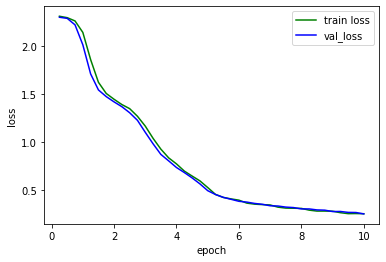

In [114]:
network = ScratchSimpleNeuralNetrowkClassifier()
network.fit(X_train, y_train, X_val, y_val, epochs=10)

In [115]:
y_pred = network.predict(X_test)

In [116]:
from sklearn import metrics

print(f'予測結果の正解率: {metrics.accuracy_score(y_test, y_pred)}')

予測結果の正解率: 0.93


【問題8】（アドバンス課題）誤分類の確認

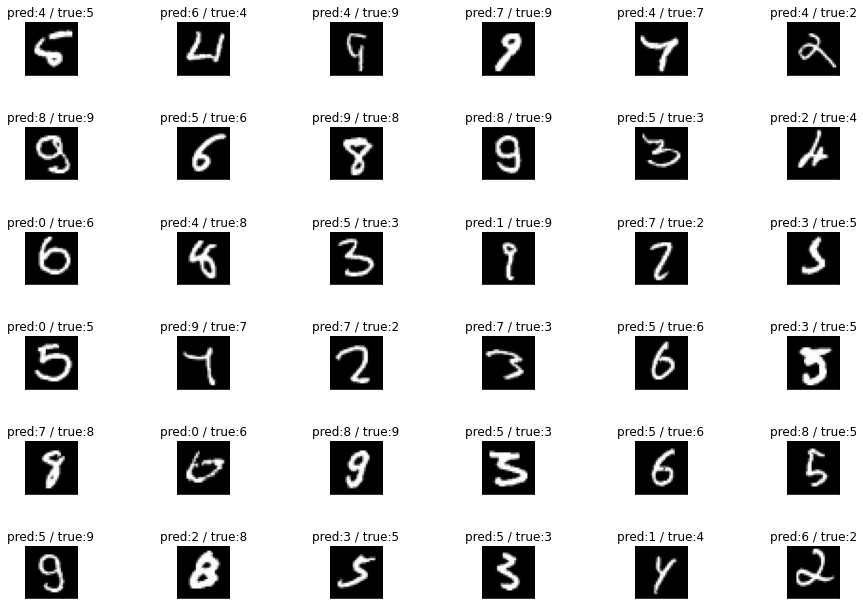

In [124]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。
Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # いくつ表示するか

true_false = y_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("pred:{} / true:{}".format(y_pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')